<a href="https://colab.research.google.com/github/heispv/projects/blob/master/machine-learning/ml/multifeature_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
my_list = [1, 2, 3, 3]
my_tuple = (1, 2, 3, 3)

In [ ]:
my_list

[1, 2, 3, 3]

In [ ]:
my_list.append(10)

In [ ]:
my_list

[1, 2, 3, 3, 10]

In [ ]:
my_list[3] = 'x'
my_list

[1, 2, 3, 'x', 10]

In [ ]:
my_tuple

(1, 2, 3, 3)

In [ ]:
import numpy as np

In [ ]:
ex1 = np.array(2)
ex1, ex1.ndim, ex1.shape

(array(2), 0, ())

In [ ]:
ex2 = np.array(2, ndmin=1)
ex2, ex2.ndim, ex2.shape

(array([2]), 1, (1,))

# Multi-feature Regression

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Generate sample data with more noise
np.random.seed(42)
num_samples = 100
size = np.random.uniform(500, 2000, num_samples)
age = np.random.uniform(1, 20, num_samples)
price = 1000 * size + 500 * age + 12 * np.random.normal(0, 15000, num_samples)  # Increased noise

In [ ]:
# Checking the shapes of our inputs and outputs
size.shape, age.shape, price.shape

((100,), (100,), (100,))

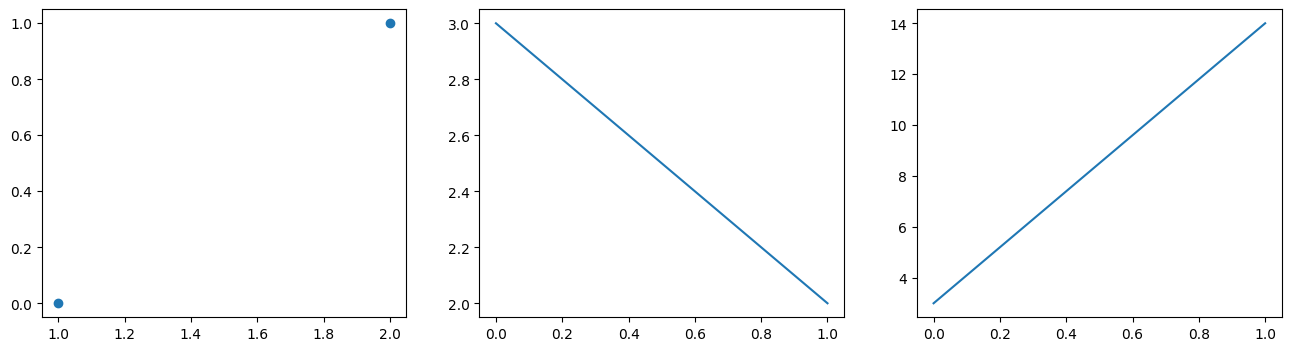

In [ ]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.scatter([1, 2], [0, 1])

plt.subplot(1, 3, 2)
# vaghti ke be plot faghat yek list az adad midim khodesh oon ro y dar nazar migire
# va x haro index motenazer ba oona
plt.plot([3, 2])

plt.subplot(1, 3, 3)
plt.plot([3, 14])

plt.show()

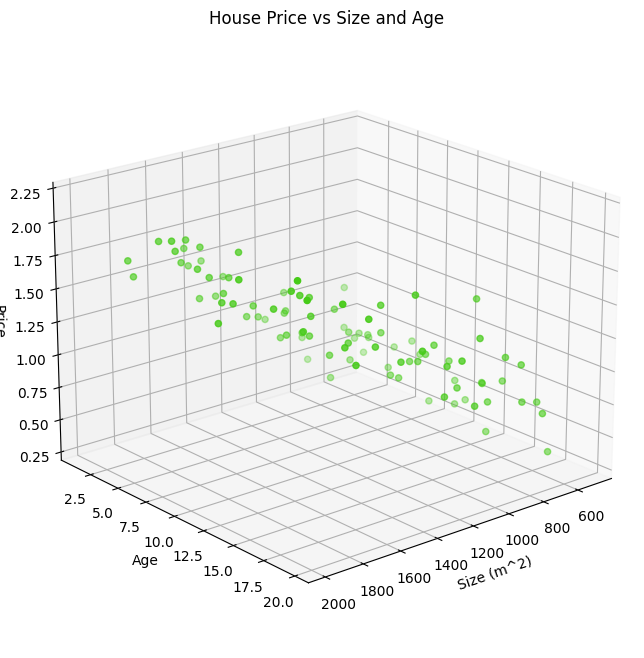

In [ ]:
# Visualize the data
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(size, age, price, color='#46CB18', marker='o')

ax.set_xlabel('Size (m^2)')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('House Price vs Size and Age')

# Enable 3D rotation
ax.view_init(elev=20, azim=50)

plt.show()

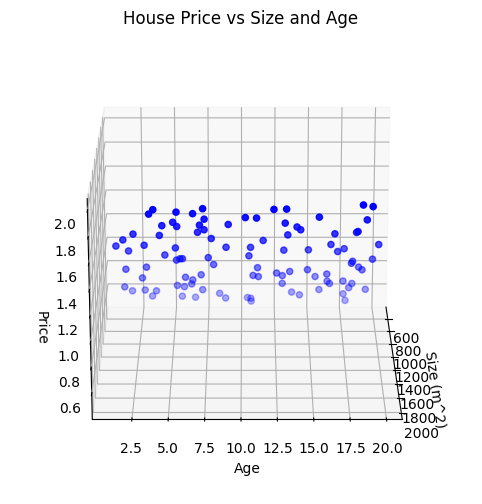

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate sample data with more noise
np.random.seed(42)
num_samples = 100
size = np.random.uniform(500, 2000, num_samples)
age = np.random.uniform(1, 20, num_samples)
price = 1000 * size + 500 * age + np.random.normal(0, 15000, num_samples)  # Increased noise

# Create the figure and 3D axes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d');

# Create scatter plot
scatter = ax.scatter(size, age, price, c='b', marker='o')
ax.set_xlabel('Size (m^2)')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('House Price vs Size and Age')

# Function to update the plot for each animation frame
def update(frame):
    ax.view_init(elev=20, azim=frame)  # Update the viewing angle
    return scatter

# Create the animation
animation = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=100)

# Display the animation in the notebook
html = animation.to_html5_video()
HTML(html)


In [ ]:
# Use stacking
x_ex = np.column_stack((size[:5], age[:5]))

In [ ]:
x_ex

array([[1.06181018e+03, 1.59715453e+00],
       [1.92607146e+03, 1.30917978e+01],
       [1.59799091e+03, 6.97276364e+00],
       [1.39798773e+03, 1.06628431e+01],
       [7.34027961e+02, 1.82437630e+01]])

> zamani ke ma `axis=0` gharar midim yani mikhaim dar sotoon ha miangin begirim, ama agar `axis=1` gharar bedim yani mikhaim dar satr ha miangin begirim.

In [ ]:
np.mean(x_ex, axis=0)

array([1343.57764751,   10.11366442])

In [ ]:
x_ex.shape

(5, 2)

In [ ]:
def introduce(name):
  print(f'Salam esem man {name} hastesh')

In [ ]:
introduce('peyman')

Salam esem man peyman hastesh


In [ ]:
def your_age(miladi):
  age = 2023 - miladi
  shamsi = 1402 - age
  return age, shamsi

In [ ]:
sene_man, tarikh_tavalod = your_age(1998)

In [ ]:
sene_man

25

In [ ]:
tarikh_tavalod

1377

In [ ]:
# Normalize the features
def normalize_features(features):
    means = np.mean(features, axis=0) #chon axis=0 pas vase sootoon hesab mishe
    stds = np.std(features, axis=0) #chon axis=0 pas vase sootoon hesab mishe
    normalized_features = (features - means) / stds
    return normalized_features, means, stds

In [ ]:
x_ex_normalized = normalize_features(x_ex)
x_ex_normalized

(array([[-0.68022109, -1.51662502],
        [ 1.40621122,  0.53034772],
        [ 0.6141847 , -0.55933343],
        [ 0.13135258,  0.09779806],
        [-1.47152741,  1.44781266]]),
 array([1343.57764751,   10.11366442]),
 array([414.22924445,   5.61543546]))

In [ ]:
# Prepare the features matrix
X = np.column_stack((size, age))

# Normalize the features
X_normalized, means, stds = normalize_features(X)

# Add bias term
X_normalized = np.column_stack((np.ones(len(X_normalized)), X_normalized))

# Initialize hyperparameters
learning_rate = 0.05
num_iterations = 300

In [ ]:
# Gradient descent function
def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    history = []

    for _ in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / num_samples
        theta -= learning_rate * gradient
        cost = np.sum(errors ** 2) / (2 * num_samples)
        history.append(cost)

    return theta, history

In [ ]:
# Perform gradient descent
theta, history = gradient_descent(X_normalized, price, learning_rate, num_iterations)

# Print the learned parameters
print('Learned parameters:')
print('Theta 0:', theta[0])
print('Theta 1:', theta[1])
print('Theta 2:', theta[2])


Epoch 0: Cost = 832547783284.7561, Thetas = [60606.05087918 22113.93536979  -457.06917462]
Epoch 10: Cost = 298537118572.7665, Thetas = [522666.47093181 190686.64180815  -2408.19580794]
Epoch 20: Cost = 107110120470.86406, Thetas = [799319.11257732 291610.99459644  -1768.65153021]
Epoch 30: Cost = 38478869732.653465, Thetas = [ 9.64961268e+05  3.52053716e+05 -3.03274403e+02]
Epoch 40: Cost = 13869179972.808603, Thetas = [1064137.34589542  388263.94701815    1222.46951   ]
Epoch 50: Cost = 5043341931.343316, Thetas = [1123517.72693976  409963.84348598    2524.47155746]
Epoch 60: Cost = 1877629211.358741, Thetas = [1159070.95453705  422972.21274286    3536.86993381]
Epoch 70: Cost = 741957052.9026092, Thetas = [1180357.9852087   430772.78629962    4282.63114568]
Epoch 80: Cost = 334482362.6296713, Thetas = [1193103.31679852  435451.95035971    4812.87072794]
Epoch 90: Cost = 188259667.45411864, Thetas = [1200734.41762419  438259.6299773     5180.57413053]
Epoch 100: Cost = 135779431.7820

In [ ]:
random_indices = np.random.choice(len(X_normalized), 10, replace=False)
X_random = X_normalized[random_indices]
y_true = price[random_indices]
y_pred = X_random.dot(theta)

# Print the true and predicted values
print('Selected Samples:')
for i in range(10):
    print(f'Sample {i+1}:\ny_true = {y_true[i]:.2f}\ny_pred = {y_pred[i]:.2f}\nError(%) = {(abs(y_true[i]-y_pred[i])/y_true[i]):.4f}\n')

Selected Samples:
Sample 1:
y_true = 974730.61
y_pred = 977386.25
Error(%) = 0.0027

Sample 2:
y_true = 1523606.30
y_pred = 1529220.04
Error(%) = 0.0037

Sample 3:
y_true = 613681.03
y_pred = 611889.65
Error(%) = 0.0029

Sample 4:
y_true = 949647.26
y_pred = 964941.06
Error(%) = 0.0161

Sample 5:
y_true = 1389725.88
y_pred = 1402254.84
Error(%) = 0.0090

Sample 6:
y_true = 774540.37
y_pred = 796492.62
Error(%) = 0.0283

Sample 7:
y_true = 743967.55
y_pred = 737345.88
Error(%) = 0.0089

Sample 8:
y_true = 551508.31
y_pred = 535766.58
Error(%) = 0.0285

Sample 9:
y_true = 1496939.73
y_pred = 1490157.25
Error(%) = 0.0045

Sample 10:
y_true = 803811.96
y_pred = 814141.58
Error(%) = 0.0129

